In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
print("1.Load Data",)

1.Load Data


In [4]:
bc = load_breast_cancer()
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
print("2.Creacte Dataframe")
print(df.head())

2.Creacte Dataframe
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst ar

In [5]:
X_cancer = df.drop('target', axis=1)
y_cancer = df['target']

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=101
    )
print("3.split X and y")
print('X_cancer:', X_cancer_train.shape)
print('y_cancer:', X_cancer_test.shape)

3.split X and y
X_cancer: (398, 30)
y_cancer: (171, 30)


In [6]:
scaler = StandardScaler()
scaler.fit(X_cancer_train)
X_cancer_train_s = scaler.transform(X_cancer_train)
X_cancer_test_s = scaler.transform(X_cancer_test)
df_ts_c = pd.DataFrame(X_cancer_train_s, columns=X_cancer.columns)
print("5.Feature Scaling")
print(df_ts_c.describe())

5.Feature Scaling
        mean radius  mean texture  mean perimeter     mean area  \
count  3.980000e+02  3.980000e+02    3.980000e+02  3.980000e+02   
mean  -4.815802e-15  1.324457e-15   -1.008685e-15  7.007237e-16   
std    1.001259e+00  1.001259e+00    1.001259e+00  1.001259e+00   
min   -1.962948e+00 -2.197955e+00   -1.922573e+00 -1.409040e+00   
25%   -6.994600e-01 -7.395325e-01   -6.967683e-01 -6.761255e-01   
50%   -2.261573e-01 -9.832940e-02   -2.205841e-01 -3.021781e-01   
75%    4.750835e-01  5.834489e-01    4.982494e-01  3.216744e-01   
max    3.735923e+00  4.561537e+00    3.874681e+00  5.192092e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     3.980000e+02      3.980000e+02    3.980000e+02         3.980000e+02   
mean     -3.492460e-15     -7.397767e-16   -7.141133e-17        -5.645958e-16   
std       1.001259e+00      1.001259e+00    1.001259e+00         1.001259e+00   
min      -3.106701e+00     -1.596284e+00   -1.084206e+

In [7]:
knn_cancer = KNeighborsClassifier(n_neighbors=1)
knn_cancer.fit(X_cancer_train_s, y_cancer_train)
print("create and train k-NN model ")
print("K-NN model is trained")

create and train k-NN model 
K-NN model is trained


In [9]:
predictions_c = knn_cancer.predict(X_cancer_test_s)
print("Prediction result")
print("Predictions_c =", predictions_c)

Prediction result
Predictions_c = [1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1]


8.result
[[ 61   5]
 [  3 102]]
              precision    recall  f1-score   support

   malignant       0.95      0.92      0.94        66
      benign       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

false negative ตือ การวินิฉัยว่าเนื้อดีเป็นเนื้อร้าย
false positive ตือ การวินิฉัยว่าเนื้อร้ายเป็นเนื้อดี
false positive อัตรายก่วาเพราะอาจทำให้ได้รับการรักษาล่าช้าแต่ false negative ยังมีโอกาศได้รับการวินิฉัยซ้ำษาโดยแพทย์
ค่า recall ของคลาส malignant บอก ความแม่นยำในการตรวจเนื้อร้าย ซึ่งมีผลต่อเวลาที่ได้รับการรักษาและรอดชีวิตของผู้ป่วย


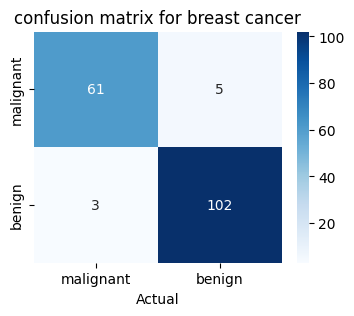

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_cancer_test, predictions_c)
print("8.result")
print(cm)
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues',
            xticklabels = bc.target_names,
            yticklabels = bc.target_names)
plt.xlabel('predicted')
plt.xlabel('Actual')
plt.title('confusion matrix for breast cancer')
plt.show
print(classification_report(y_cancer_test, predictions_c, target_names=bc.target_names))
print('false negative ตือ การวินิฉัยว่าเนื้อดีเป็นเนื้อร้าย')
print('false positive ตือ การวินิฉัยว่าเนื้อร้ายเป็นเนื้อดี')
print('false positive อัตรายก่วาเพราะอาจทำให้ได้รับการรักษาล่าช้าแต่ false negative ยังมีโอกาศได้รับการวินิฉัยซ้ำษาโดยแพทย์')
print('ค่า recall ของคลาส malignant บอก ความแม่นยำในการตรวจเนื้อร้าย ซึ่งมีผลต่อเวลาที่ได้รับการรักษาและรอดชีวิตของผู้ป่วย')